# Perros o gatos?
***Por Miguel Escalona***

                                                                                            Edición Febrero 2017

### Inicio del notebook
Para iniciar cualquier notebook, comenzaremos por invocar los módulos necesarios para su desarrollo. Para esto utilizaremos el comando ***import*** seguido del nombre del módulo. Cuando queramos utilizar una función interna del módulo, debemos escribir su nombre antes de la función. Por ejemplo:
```python
import modulo
modulo.funcion()
```
en el caso en que no queramos escribir el nombre completo de un modulo, podemos colocar con alias con el comando ***as***
```python
import modulo as md
md.funcion
```
finalmente, si solo queremos acceder de forma directa a todas las funciones internas del módulo sin necesidad de escribir su nombre (ni el alias) cada vez, podemos escribir
```python
from modulo import *
```
lo cual cargará todas las funciones del módulo sobrecargando aquellas funciones ya definidas en el código que tengan el mismo nombre. 

<p class="alert alert-danger">Este último método, aunque cómodo, es el menos aconsejable de todos</span>.

In [1]:
import pandas as pd  # Cargamos pandas con el alias pd

# Un problema de clasificación: ¿perro o gato?
En este notebook resolveremos un problema simple de clasificación que deja en evidencia conceptos básicos de Machine Learning (ML).
El problema planteado consiste en identificar la **especie** del animal (perro o gato) basados en tres características: ¿el animal busca la pelota cuando se la lanzamos?, ¿el animal suele ser apático? y ¿el animal disfruta más de la comida de perro, de la de gato o del bacon?

# Cargando los datos

Para la carga de datos usaremos la función `read_csv` de pandas. Pandas cuenta con un amplio listado de funciones para la carga de datos. Mas informacion en la [documentación de la API.](http://pandas.pydata.org/pandas-docs/stable/io.html) 

In [2]:
dfl = pd.read_csv('data/perros_o_gatos.csv', index_col='observacion')
print('Estos datos han sido tomados del libro Mastering machine learning with scikit-learn de Gavin Hackeling, \
PACKT publishing open source, pp. 99')
dfl  # En jupyter al escribir una variable sin mas, la celda nos devuelve su contenido.

Estos datos han sido tomados del libro Mastering machine learning with scikit-learn de Gavin Hackeling, PACKT publishing open source, pp. 99


,juega al busca,apatico,comida favorita,especie
observacion,,,,
1,True,False,comida de perro,perro
2,True,False,bacon,perro
3,False,False,comida de gato,gato
4,True,True,comida de gato,gato
5,True,True,bacon,perro
6,True,False,bacon,perro
7,False,True,comida de perro,perro
8,False,True,comida de gato,gato
9,False,True,bacon,gato


Los datos se componen de **observaciones** numeradas del 1 al 14 y 3 **features** o características representadas en las columnas (también se les conocen como inputs). La columna **especie** es la respuesta a nuestro problema, por lo que no representa un feature. Esto quiere decir que solo la usaremos para saber si el algoritmo de machine learning está haciendo una buena clasificación o no. A esta columna (especie) se la suele llamar *target*, *label*, *output* o *y*.

### Aprendizaje supervisado (supervised learning)

Se dice que un problema de machine learning es supervisado si dentro de los datos tenemos el **target**, por lo que podemos evaluar a nuestro algoritmo durante su entrenamiento.

### Aprendizaje no supervisado (unsupervised learning)

Si no contamos con las etiquetas o **labels** estaremos ante un problema no supervisado. El algoritmo deberá encontrar por sí mismo los patrones que puedan diferenciar los datos. 
Un ejemplo de este tipo de problemas es cuando queremos reconocer objetos en una imagen. Nuestro algoritmo intentará segmentar los diferentes objetos, usando por ejemplo sus contornos, pero sin conocer la forma exacta o el objeto que debe identificar. 

# Mini Exploratory Data Analisys (EDA)

In [3]:
dfl.describe()

,juega al busca,apatico,comida favorita,especie
count,14,14,14,14
unique,2,2,3,2
top,False,True,comida de gato,gato
freq,9,9,6,8


#### Suma, media, mediana y desviación estándard (sum, mean, median, std)
¿Cuántos animales juegan al busca? 

In [6]:
dfl['juega al busca'].sum()

5

#### Filtros de pandas
y cuantos de estos son perros?

In [4]:
dfl.loc[dfl['especie']=='perro','juega al busca'].sum()

4

### Separemos la columna *especies* para no confundirla 

In [5]:
labels = dfl['especie']
df = dfl[['juega al busca', 'apatico', 'comida favorita']]
df

,juega al busca,apatico,comida favorita
observacion,,,
1,True,False,comida de perro
2,True,False,bacon
3,False,False,comida de gato
4,True,True,comida de gato
5,True,True,bacon
6,True,False,bacon
7,False,True,comida de perro
8,False,True,comida de gato
9,False,True,bacon


In [6]:
labels 

observacion
1     perro
2     perro
3      gato
4      gato
5     perro
6     perro
7     perro
8      gato
9      gato
10     gato
11     gato
12     gato
13    perro
14     gato
Name: especie, dtype: object

### ¡La variable *comida favorita* es del tipo categórica!
Esta variable tiene tres valores posibles. Para conocer con qué frecuencia aparece cada valor podemos utilizar el método `value_counts()` del dataframe

In [7]:
df['comida favorita'].value_counts()

comida de gato     6
bacon              5
comida de perro    3
Name: comida favorita, dtype: int64

### Codificación de variables categóricas
Las variables categóricas deben ser convertidas a numéricas para poder ser interpretadas por el algorítmo de machine learning. La codificación más natural sería:

```
| comida favorita | valor   |
|-----------------|---------|
|comida de gato   |    0    |
|comida de perro  |    1    |
|bacon            |    2    |
-----------------------------

```
Sin embargo, esta codificación asigna un orden *artificial* a las variables. Nuestro ordenador sabe que *0 < 1 < 2*, por lo que asociará que

*comida de gato < comida de perro < bacon*.

### Codificacion one-Hot
Este tipo de codificación representa la columna *comida favorita* en tres columnas de 0 o 1 de la siguiente manera
```
| comida favorita | comida favorita=comida de gato | comida favorita=comida de perro | comida favorita=bacon | 
|-----------------|--------------------------------|---------------------------------|-----------------------|
|comida de gato   |                1               |                0                |            0          |
|comida de perro  |                0               |                1                |            0          |
|bacon            |                0               |                0                |            1          |
--------------------------------------------------------------------------------------------------------------
```
Atención, se debe tener cuidado cuando se desee utilizar este tipo de codificación en datasets (muy) grandes en el que  el némero de categorías son cientos o miles, pues cada categoría generará una nueva columna en nuestro dataset.

# All you need is... scikit-learn (sklearn) ... well, not really.
El módulo scikit-learn contiene una gran mayoría de las herramientas que necesitamos para resolver un problema típico de machine learning. Aquí podemos encontrar algorítmos de clasificación, regresión, clustering; además de métodos para el preprocesado de datos. Mas información en el [sitio oficial de scikit-learn](http://scikit-learn.org/stable/).

Para cargar este módulo usaremos el comando
```python
import sklearn
```
en lugar de usar su nombre completo.

Otra forma de cargar funciones de un módulo es hacer referencia a la función directamente:
```python
from sklearn.preprocessing import OneHotEncoder
```
A pesar de que la función `OneHotEncoder` existe en sklearn, nosotros utilizaremos otra función llamada `DictVectorizer`. Esta función recibe como entrada variables numéricas y/o categóricas y devuelve las variables numéricas como flotantes y a las categóricas le aplica la codificación one-hot.

Nota: la función `DictVectorizer` no respeta el orden de entrada de las columnas pudiendo devolver un dataframe con otro orden de columnas. Para que respete el orden de las filas, debemos especificar el parámetro **`orient='records'`**

In [10]:
from sklearn.feature_extraction import DictVectorizer
vectorizer = DictVectorizer(sparse=False)
ab=vectorizer.fit_transform(df.to_dict(orient='records'))
ab

array([[ 0.,  0.,  0.,  1.,  1.],
       [ 0.,  1.,  0.,  0.,  1.],
       [ 0.,  0.,  1.,  0.,  0.],
       [ 1.,  0.,  1.,  0.,  1.],
       [ 1.,  1.,  0.,  0.,  1.],
       [ 0.,  1.,  0.,  0.,  1.],
       [ 1.,  0.,  0.,  1.,  0.],
       [ 1.,  0.,  1.,  0.,  0.],
       [ 1.,  1.,  0.,  0.,  0.],
       [ 1.,  0.,  1.,  0.,  0.],
       [ 1.,  1.,  0.,  0.,  0.],
       [ 1.,  0.,  1.,  0.,  0.],
       [ 0.,  0.,  0.,  1.,  0.],
       [ 1.,  0.,  1.,  0.,  0.]])

In [11]:
labels.map(lambda x: 1 if x=='perro' else 0)

observacion
1     1
2     1
3     0
4     0
5     1
6     1
7     1
8     0
9     0
10    0
11    0
12    0
13    1
14    0
Name: especie, dtype: int64

In [12]:
from sklearn.feature_extraction import DictVectorizer
vectorizer = DictVectorizer(sparse=False)
ab=vectorizer.fit_transform(df.to_dict(orient='records'))
dft = pd.DataFrame(ab, columns=vectorizer.get_feature_names())
dft.head()

,apatico,comida favorita=bacon,comida favorita=comida de gato,comida favorita=comida de perro,juega al busca
0,0.0,0.0,0.0,1.0,1.0
1,0.0,1.0,0.0,0.0,1.0
2,0.0,0.0,1.0,0.0,0.0
3,1.0,0.0,1.0,0.0,1.0
4,1.0,1.0,0.0,0.0,1.0


De esta forma, nuestro dataframe ya está preparado para ser utilizado por cualquiera de los algoritmos de clasificación de scikit-learn. 

# Algoritmo de clasificación: Arbol de decisión

Un árbol de clasificación divide los datos en subconjuntos cada vez mas pequeños para ir determinando la clase a la cual pertenecen.  Básicamente, lo que hace este algoritmo es buscar la pregunta necesaria para poder separar la mayor cantidad de datos en dos grupos. Luego, vuelve a buscar la siguiente pregunta que romperá mejor al subgrupo y así, sucesivamente, hasta reducir los grupos lo suficiente hasta que quedemos satisfechos. 

## Las preguntas
Para este ejemplo tenemos tantas preguntas posibles como features. Por ejemplo, podemos preguntar:
* El animal juega al busca, ¿si o no?
* El animal es apático, ¿si o no?
* ¿le gusta la comida de gato?
* ¿le gusta la comida de perro?
* ¿le gusta el bacon?

## Pero,  ¿qué deberíamos preguntar primero? 
Para responder esta clase de preguntas los algoritmos de machine learning se sirven de una *función de transferencia* o una *función de costo*. Un árbol de decisión utiliza una función de tranferencia llamada ***Entropía*** para cuantificar el nivel de incertidumbre que tenemos en la clasificación de los datos. Es decir, la pregunta que sea capaz de reducir mas la incertidumbre (entropía) será la primera pregunta a hacer.

La entropía viene definida de la siguiente manera:

$H(x) = - \sum_{i=1}^n p_i \log_2 p_i$

donde $H$ es la entropía, $p_i$ es la probabilidad que sea perro o gato. Veamos cual es la entropía de nuestro problema:

Como tenemos 6 perros y 8 gatos, la probabilidad de escoger un perro al azar es $\frac{6}{14}$, y la de que sea gato es $\frac{8}{14}$. Entonces la entropía inicial de nuestro problema es:

$H(x) = -(\frac{6}{14}\log_2\frac{6}{14} + \frac{8}{14}\log_2\frac{8}{14}) = 0.9852... $

In [13]:
from numpy import log2
def entropia_perro_gato(count_perro, count_gato):
    prob_perro = count_perro / float(count_perro + count_gato)
    prob_gato = count_gato / float(count_perro + count_gato)
    return 0.0 if not count_perro or not count_gato else -(prob_perro*log2(prob_perro) + prob_gato*log2(prob_gato))

## Evaluemos la pregunta si le gusta jugar al busca
Evaluemos las entropías:

In [14]:
perro = dfl['especie']=='perro'
gato = dfl['especie']=='gato'
no_busca = dfl['juega al busca']==False
si_busca = dfl['juega al busca']==True

print('A %d perros y %d gatos sí les gusta jugar al busca. H=%0.4f' % (
      dfl[perro]['juega al busca'].sum(),#podemos contar sumando el numero de True
      len(dfl[gato & si_busca]),#o filtrando y contando cueantos valores quedan
      entropia_perro_gato(4,1),
     ))



print('A %d perros y %d gatos no les gusta jugar al busca. H=%0.4f' % (
      len(df[perro&no_busca]),
      len(df[gato&no_busca]),
      entropia_perro_gato(len(dfl[perro & no_busca]),
                          len(dfl[gato & no_busca])),
     ))

A 4 perros y 1 gatos sí les gusta jugar al busca. H=0.7219
A 2 perros y 7 gatos no les gusta jugar al busca. H=0.7642


### ¿y la comida de gato?
* a 0 perros y 6 gatos les gusta la comida de gatos
* mientras que a 6 perros y 2 gatos no les gusta.
Su entropía es:

In [15]:
print(entropia_perro_gato(0,6))
print(entropia_perro_gato(6,2))

0.0
0.811278124459


# Ahora sí, el árbol de decisión automático

In [16]:
from sklearn.tree import DecisionTreeClassifier

classifier = DecisionTreeClassifier(criterion='entropy')
classifier.fit(dft, labels)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

# importancia de los features
como vamos a graficar, utilizaremos la función *mágica* de jupyter 
```python
%matplotlib inline
```
la cual nos permite realizar gráficos en el notebook.

In [17]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

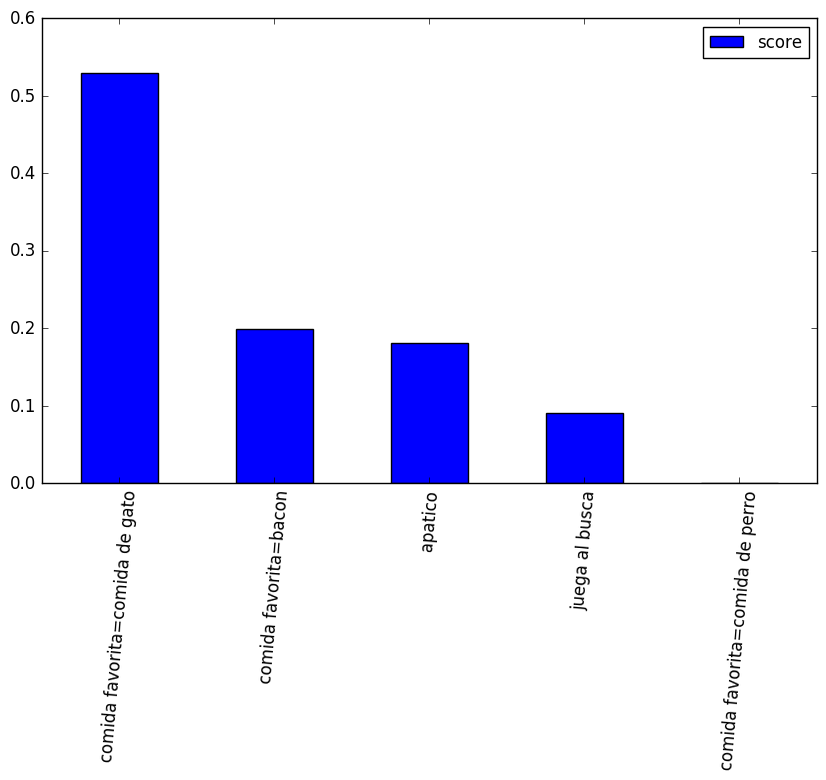

In [18]:
feat = pd.DataFrame(index=dft.keys(), data=classifier.feature_importances_, columns=['score'])
feat = feat.sort_values(by='score', ascending=False)
feat.plot(kind='bar',rot=85)

# Bonus: Visualizando el arbol, requiere graphviz
```
conda install graphviz
```

In [19]:
from sklearn.tree import export_graphviz
dotfile = open('perro_gato_tree.dot', 'w')
export_graphviz(
    classifier, 
    out_file = dotfile, 
    filled=True, 
    feature_names = dft.columns, 
    class_names=list(labels), 
    rotate=True, 
    max_depth=None, 
    rounded=True,
)
dotfile.close()

La celda anterior exportó el árbol de decisión creado con sklearn y entrenado con nuestros datos a un archivo .dot

Este archivo lo procesaremos con el comando dot de la terminal. Desde jupyter, podemos ejecutar comandos de terminal sin salir del notebook:

In [17]:
!dot -Tpng perro_gato_tree.dot -o perro_gato_tree.png 

finalmente para cargar la imagen usamos:

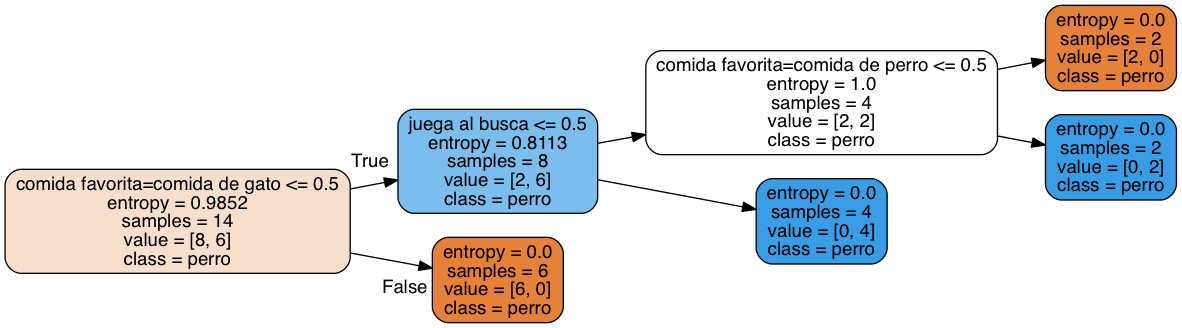

In [18]:
from IPython.display import Image
Image('perro_gato_tree.png', width=1000)

# Evaluación del modelo

In [53]:
import numpy as np

In [54]:
np.array(classifier.predict(dft))

array(['perro', 'perro', 'gato', 'gato', 'perro', 'perro', 'perro', 'gato',
       'gato', 'gato', 'gato', 'gato', 'perro', 'gato'], dtype=object)

In [55]:
np.array(labels)

array(['perro', 'perro', 'gato', 'gato', 'perro', 'perro', 'perro', 'gato',
       'gato', 'gato', 'gato', 'gato', 'perro', 'gato'], dtype=object)

In [57]:
print('Error rate %0.4f'%((np.array(classifier.predict(dft))==np.array(labels)).sum() / float(len(labels))))

Error rate 1.0000


## Ahora evaluemos sobre datos nunca vistos por el modelo!!!!!

In [23]:
test = pd.read_csv('data/perros_o_gatos_TEST.csv', index_col='observacion')
test

,juega al busca,apatico,comida favorita,especie
observacion,,,,
1,True,False,bacon,perro
2,True,True,comida de perro,perro
3,False,True,comida de perro,gato
4,False,True,bacon,gato
5,False,False,comida de gato,gato


In [24]:
label_test = test['especie']
del test['especie']

In [26]:
ab = vectorizer.transform(test.to_dict(orient='records'))
dftest = pd.DataFrame(ab, columns=vectorizer.get_feature_names())
dftest.head()

,apatico,comida favorita=bacon,comida favorita=comida de gato,comida favorita=comida de perro,juega al busca
0,0.0,1.0,0.0,0.0,1.0
1,1.0,0.0,0.0,1.0,1.0
2,1.0,0.0,0.0,1.0,0.0
3,1.0,1.0,0.0,0.0,0.0
4,0.0,0.0,1.0,0.0,0.0


In [30]:
list(classifier.predict(dftest))

['perro', 'perro', 'perro', 'gato', 'gato']

In [32]:
list(label_test)

['perro', 'perro', 'gato', 'gato', 'gato']

In [49]:
print('Error rate %0.4f'%((np.array(classifier.predict(dftest))==np.array(label_test)).sum() / float(len(label_test))))

Error rate 0.8000
